In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [42]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [43]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Copy of original data
train_original=train.copy()
test_original=test.copy()

In [5]:
train.columns, test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape, test.shape

((614, 13), (367, 12))

<h1>Univariete Analysis

In [11]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
# Normalize can be set to True to print proportions instead of number IN %
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

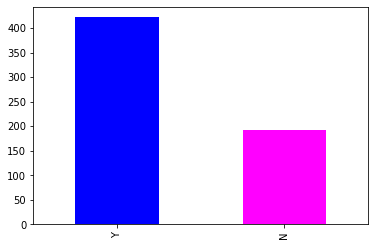

In [33]:
c = ["blue", "magenta"]
train["Loan_Status"].value_counts().plot.bar(x, color = c)
plt.savefig('my_plot.png')

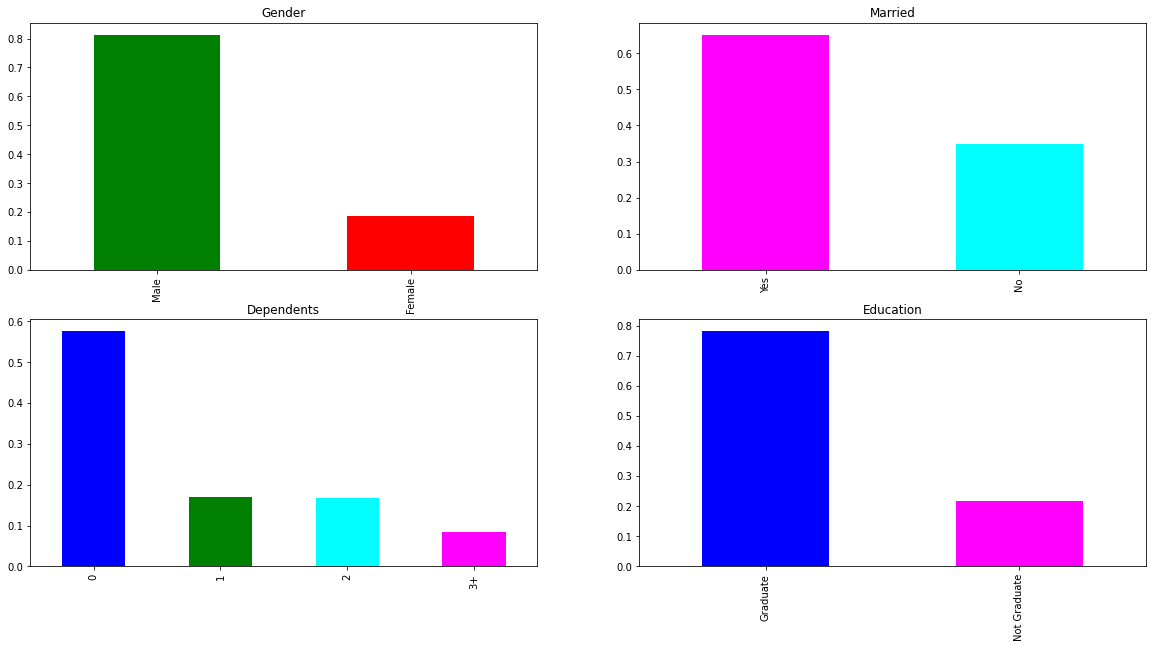

In [49]:
# Visualizing categorical features
plt.figure(1)
plt.subplot(221)
a = ['green', 'red']
b = ['magenta', 'cyan']
d = ['blue', 'green', 'cyan', 'magenta']
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender', color = a)

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married', color = b)

plt.subplot(223)
train['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents', color = d)

plt.subplot(224)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education', color = c)

plt.show()

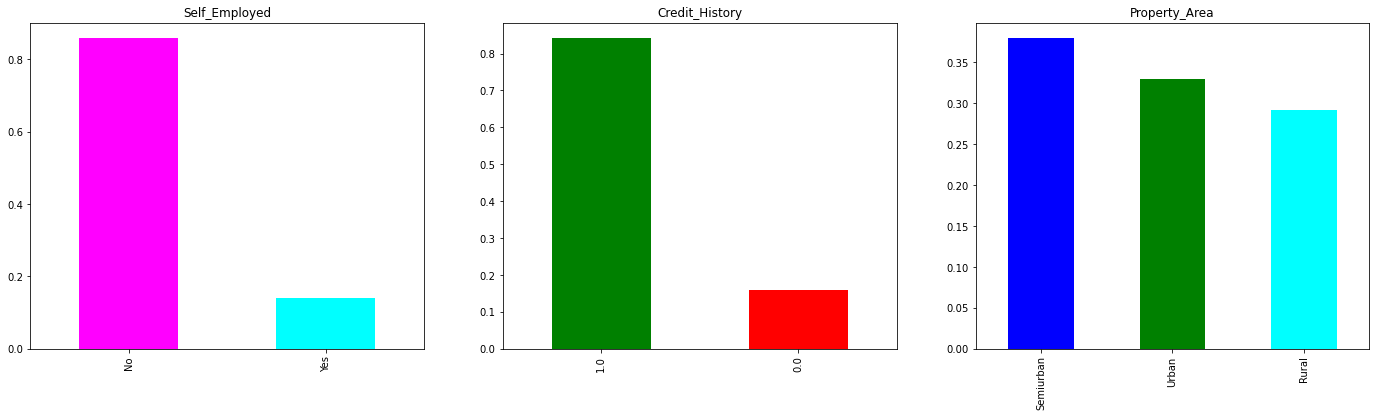

In [52]:
# Visualizing remaining categorical features
plt.figure(1)
plt.subplot(131)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Self_Employed', color = b)

plt.subplot(132)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History', color = a)

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area', color = d)

plt.show()

<AxesSubplot:>

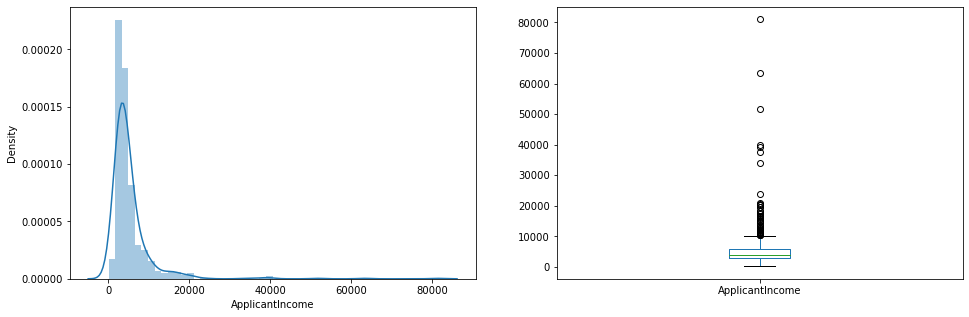

In [54]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"])

plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

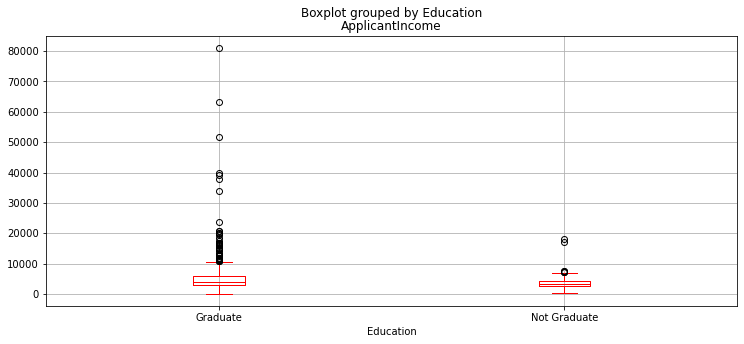

In [64]:
train.boxplot(column = "ApplicantIncome", by = "Education", figsize=(12,5),color = "red")

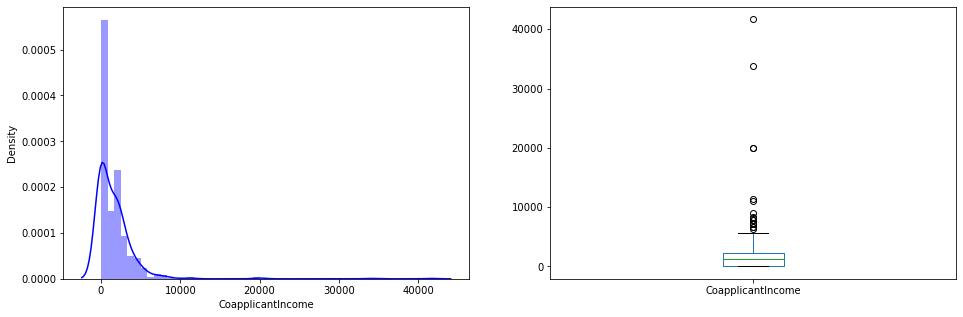

In [66]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'], color = "blue");

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

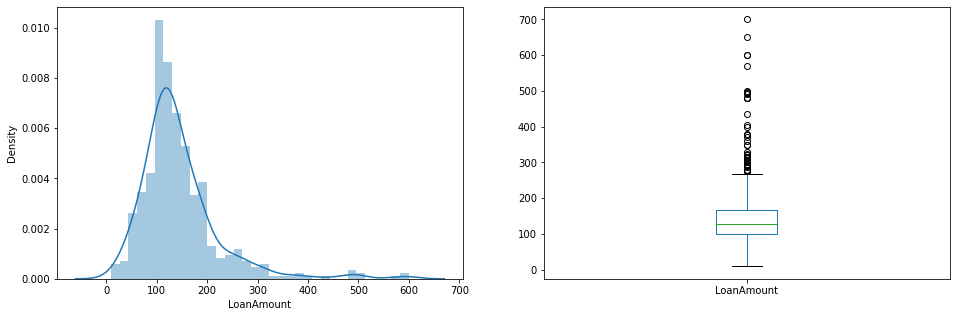

In [67]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

<h1><span style="color:magenta">Bivariate Analysis</span>

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


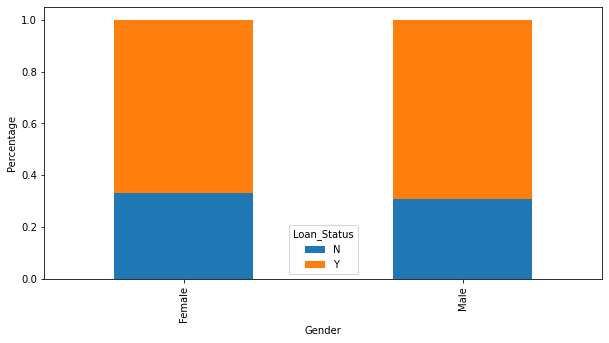

In [70]:
print(pd.crosstab(train['Gender'],train['Loan_Status']))

Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')
plt.savefig('my_plot2.png')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


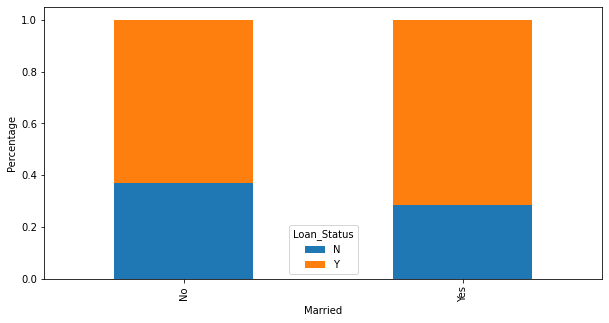

In [71]:
print(pd.crosstab(train['Married'],train['Loan_Status']))

Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10, 5))
plt.xlabel('Married')
p = plt.ylabel('Percentage')
plt.savefig('my_plot3.png')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


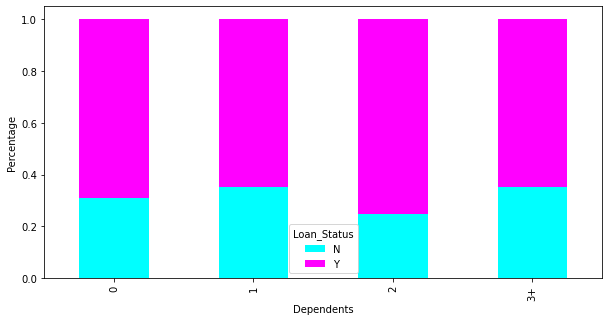

In [74]:
print(pd.crosstab(train['Dependents'],train['Loan_Status']))
c = ["cyan", "magenta"]
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(10, 5), color = c)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')
plt.savefig('my_plot4.png')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


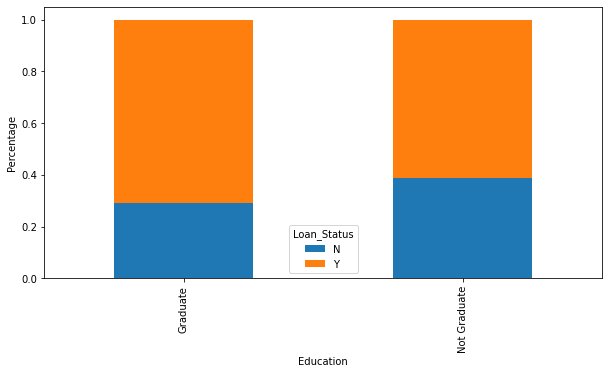

In [75]:
print(pd.crosstab(train['Education'],train['Loan_Status']))

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


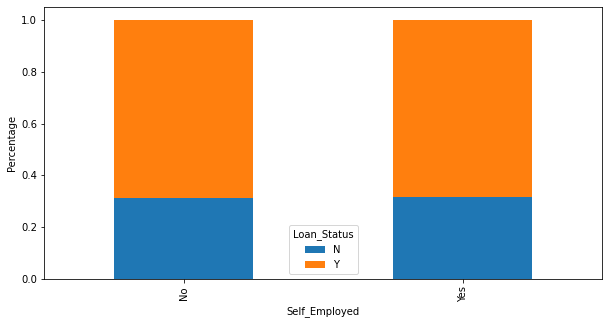

In [77]:
print(pd.crosstab(train['Self_Employed'],train['Loan_Status']))

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


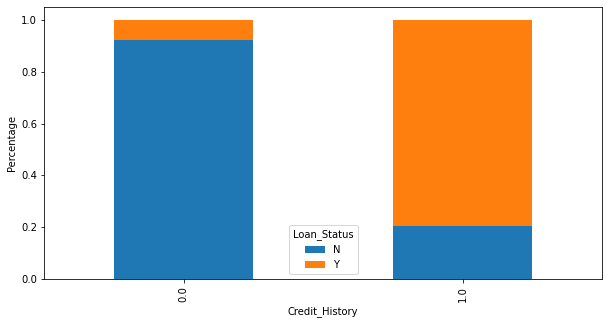

In [81]:
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10, 5))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


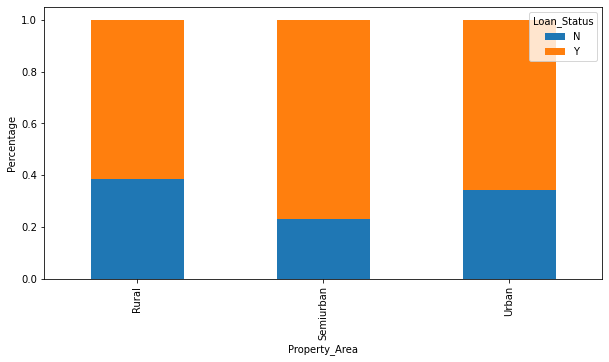

In [84]:
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5))
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

In [85]:
# Making bins for Applicant income variable
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

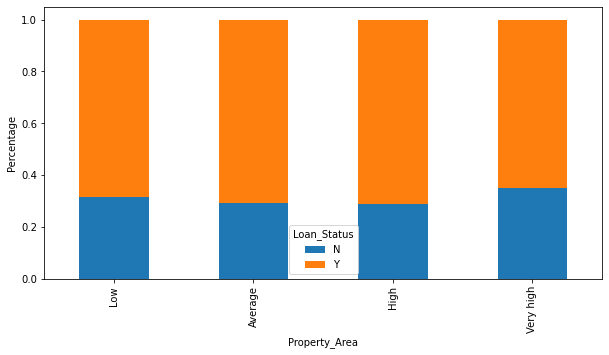

In [87]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(10,5))
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

In [88]:
# Making bins for Coapplicant income variable
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

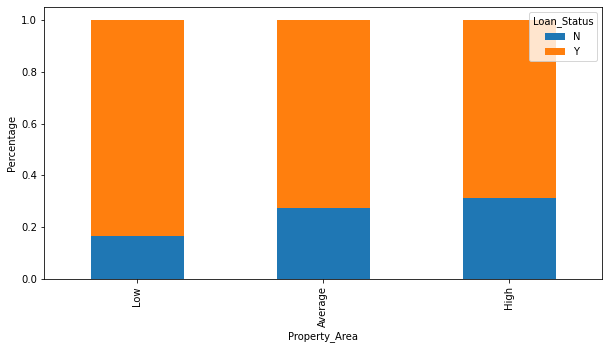

In [89]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(10,5) )
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

In [90]:
# Making bins for LoanAmount variable
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)

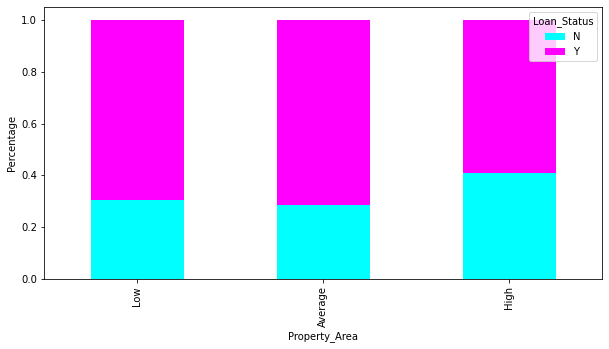

In [95]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(10,5), color = c)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

In [96]:
# Drop the new variable of bins
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin'], axis=1)

In [97]:
# replacing 3+ in Dependents variable with 3
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
test['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

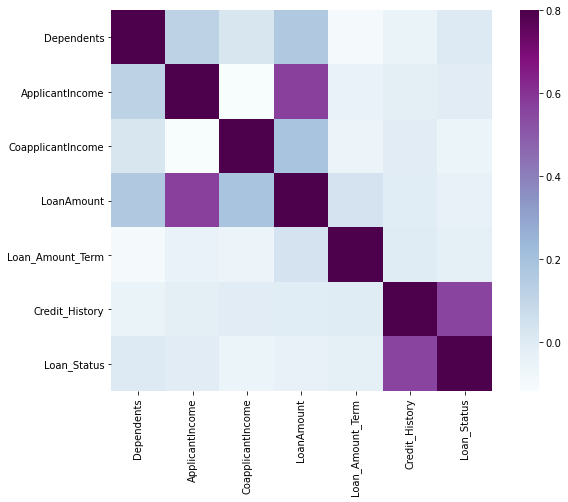

In [103]:
# Print correlation matrix
matrix = train.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

<h4>Missing value Treatment

In [105]:
# Checking the missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [106]:
# replacing the missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [107]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [115]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [131]:
# Replacing the missing value in LoanAmount based on the values of Self_Employed and Education Variable
table = train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
train['LoanAmount'].fillna(train['LoanAmount'].isnull(), inplace=True)

In [132]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [139]:
# Similar changes in test file
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
table = test.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
test['LoanAmount'].fillna(test['LoanAmount'].isnull(), inplace=True)

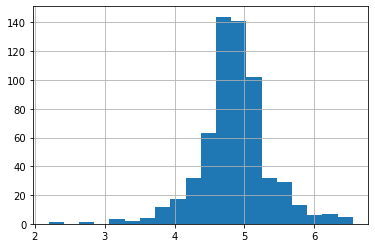

In [140]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [141]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [142]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [143]:
# Adding dummies to the dataset
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [144]:
# Importing packages for cross validation and logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [184]:
# logistic regression
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xr,xl = X.loc[train_index],X.loc[test_index]
    yr,yl = y[train_index],y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xr, yr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.6967213114754098

2 of kfold 5
accuracy_score 0.7704918032786885

3 of kfold 5
accuracy_score 0.7377049180327869

4 of kfold 5
accuracy_score 0.7295081967213115

5 of kfold 5
accuracy_score 0.7295081967213115


In [212]:
# Read submission file
submission=pd.read_csv("C:/Users/gogo/Desktop/1/submission.csv")

In [213]:
submission['Loan_Status']=pred_test               # Fill predictions in Loan_Status variable of submission file
submission['Loan_ID']=test_original['Loan_ID']    # Fill Loan_ID of submission file with the Loan_ID of original test file

In [215]:
# Replacing 0 and 1 with N and Y in Loan_Status
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [216]:
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic1.csv')

In [185]:
# Total_Income feature
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']


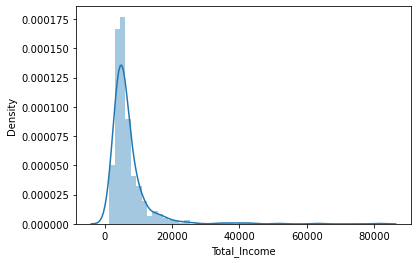

In [186]:
sns.distplot(train['Total_Income']);

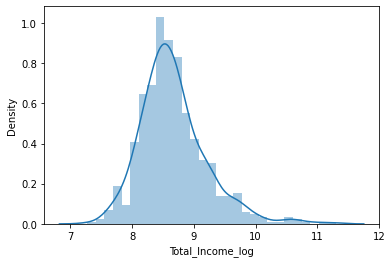

In [187]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

In [188]:
# EMI feature
train['EMI']=(train['LoanAmount']/train['Loan_Amount_Term'])*1000
test['EMI']=(test['LoanAmount']/test['Loan_Amount_Term'])*1000

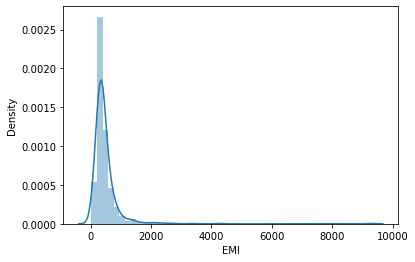

In [189]:
sns.distplot(train['EMI']);

In [190]:
# Balance Income feature
train['Balance Income']=train['Total_Income']-(train['EMI']) 
test['Balance Income']=test['Total_Income']-(test['EMI'])

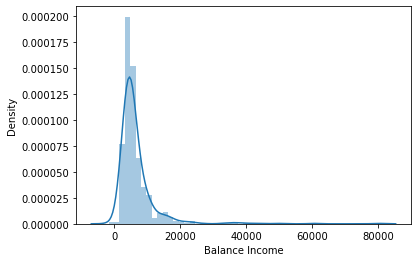

In [191]:
sns.distplot(train['Balance Income']);

<h3>Model Building

<h1>Logistic Regression

In [192]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status                # Save target variable in separate dataset

In [193]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.6910569105691057

2 of kfold 5
accuracy_score 0.7886178861788617

3 of kfold 5
accuracy_score 0.7235772357723578

4 of kfold 5
accuracy_score 0.7317073170731707

5 of kfold 5
accuracy_score 0.7295081967213115


In [217]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

In [250]:
LR = pd.read_csv('Log2.csv')
LR.head(10)

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y
5,5,LP001054,Y
6,6,LP001055,Y
7,7,LP001056,N
8,8,LP001059,Y
9,9,LP001067,Y


<h1>Decision Tree


In [195]:
from sklearn import tree

In [246]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.7479674796747967

3 of kfold 5
accuracy_score 0.6504065040650406

4 of kfold 5
accuracy_score 0.6829268292682927

5 of kfold 5
accuracy_score 0.7213114754098361


In [247]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv formatpd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('DecisionTree1.csv')

In [248]:
dT = pd.read_csv("DecisionTree1.csv")

In [249]:
dT.head(10)

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,N
3,3,LP001035,Y
4,4,LP001051,Y
5,5,LP001054,Y
6,6,LP001055,Y
7,7,LP001056,N
8,8,LP001059,Y
9,9,LP001067,Y


<h1>Random Forest

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [239]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7704918032786885


we got on accuracy 0.80, which is better than logistic and decisionTree


In [240]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID


In [241]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [242]:
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('RandomForest.csv')

In [243]:
df = pd.read_csv('RandomForest.csv')

In [244]:
df.head(12)

,Unnamed: 0,Loan_ID,Loan_Status
0,0,LP001015,Y
1,1,LP001022,Y
2,2,LP001031,Y
3,3,LP001035,Y
4,4,LP001051,Y
5,5,LP001054,Y
6,6,LP001055,Y
7,7,LP001056,N
8,8,LP001059,Y
9,9,LP001067,Y
